<h2><center> STAT 477 Final Presentation: </center></h2>
<h1><center>Analyzing American Health Data</center></h1>
<h3><center>Sarah Holecko</center></h3>
<h4><center>October 22, 2020</center></h4>

<h2><center>Foundational Information</center></h2>

<h4>The data to be analyzed in this presentation describes health, economic, and demographic characteristics of US counties.</h4>
<h4>We will study the statistical relationship between these characteristics and the selected main outcome variable: Poor Health.</h4>
<h4>Poor Health is a measure of the proportion of a county that has poor health status.</h4>

In [144]:
import numpy as np
np.set_printoptions(precision=6)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.formula.api as smf
import math

os.chdir('/Users/sarahholecko/Documents/STAT477') 

county_data = pd.read_csv("project_477.csv", index_col = "Row.Label") 

print(county_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2715 entries, AL_Autauga County to WY_Weston County
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Five-digit.FIPS.Code              2715 non-null   int64  
 1   State.FIPS.Code                   2715 non-null   int64  
 2   County.FIPS.Code                  2715 non-null   int64  
 3   State.Abbreviation                2715 non-null   object 
 4   CountyName                        2715 non-null   object 
 5   Poor.Health                       2715 non-null   float64
 6   Election.Results.2016             2715 non-null   object 
 7   Uninsured                         2715 non-null   float64
 8   Primary.Care.Physicians.Per.1000  2715 non-null   float64
 9   Mental.health.providers.Per.1000  2715 non-null   float64
 10  Adult.Obesity                     2715 non-null   float64
 11  Proportion.of.Smokers             2715 non-nul

## Summary Statistics of Poor Health

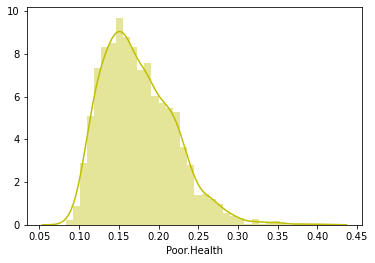

The average of Poor Health is 0.17438471454880308
The median of Poor Health is 0.1673
The standard deviation of Poor Health is 0.04517645448312751
0.250000   0.140350
0.750000   0.203950
Name: Poor.Health, dtype: float64


In [181]:
sns.distplot(county_data["Poor.Health"] , color = 'y');
plt.show()

print("The average of Poor Health is " + str(county_data["Poor.Health"].mean()))
print("The median of Poor Health is " + str(county_data["Poor.Health"].median()))
print("The standard deviation of Poor Health is " + str(county_data["Poor.Health"].std()))
print(county_data["Poor.Health"].quantile([.25,.75]))

In [53]:
#Here I created a dataframe with some statistics of the data grouped by states. 
#They examine the state averages of each variable from the county data. 

avg_poor_health = county_data.groupby("State.Abbreviation")["Poor.Health"].mean()
avg_physicians = county_data.groupby("State.Abbreviation")["Primary.Care.Physicians.Per.1000"].mean()
avg_uninsured = county_data.groupby("State.Abbreviation")["Uninsured"].mean()
avg_obesity = county_data.groupby("State.Abbreviation")["Adult.Obesity"].mean()
avg_smokers = county_data.groupby("State.Abbreviation")["Proportion.of.Smokers"].mean()
avg_physinact = county_data.groupby("State.Abbreviation")["Physical.Inactivity"].mean()
avg_income = county_data.groupby("State.Abbreviation")["Median.Household.Income"].mean()
avg_over65 = county_data.groupby("State.Abbreviation")["Over.65"].mean()

state_data = pd.merge(avg_poor_health, avg_uninsured,  on = "State.Abbreviation")
state_data = pd.merge(state_data, avg_physicians, on = "State.Abbreviation")
state_data = pd.merge(state_data, avg_obesity, on = "State.Abbreviation")
state_data = pd.merge(state_data, avg_smokers, on = "State.Abbreviation")
state_data = pd.merge(state_data, avg_physinact, on = "State.Abbreviation")
state_data = pd.merge(state_data, avg_income, on = "State.Abbreviation")
state_data = pd.merge(state_data, avg_over65, on = "State.Abbreviation")

print(state_data)

#Looking at the averages below, it seems like poor health could be related to access to healthcare, behavioral habits, and financial security.


                    Poor.Health  Uninsured  Primary.Care.Physicians.Per.1000  \
State.Abbreviation                                                             
AK                     0.141050   0.175750                          0.718500   
AL                     0.229694   0.114602                          0.452156   
AR                     0.231626   0.096485                          0.472055   
AZ                     0.203027   0.132853                          0.506467   
CA                     0.166470   0.077289                          0.704807   
CO                     0.139791   0.103494                          0.699774   
CT                     0.113317   0.052617                          0.795000   
DC                     0.130300   0.040800                          1.177000   
DE                     0.159567   0.074100                          0.635333   
FL                     0.192335   0.153036                          0.512773   
GA                     0.197108   0.1572

<h2><center>Key Questions</center></h2>

<h3>1. Is access to health care a strong predictor of the health index of a population? </h3> 
<h3>2. How do smoking and drinking correlate to the health index of a population? </h3>
<h3>3. Is there a relationship between financial security and health? </h3>

<h2><center> Question 1 </center></h2>
<h3>Variables: Primary Care Physician Availability and Insurance</h3>
<h3>Step 1: Graphical and numerical summaries of x-variable AND x-variable against y-variable</h3>
<h3>Step 2: Comparing both predictor variables</h3>
<h3>Step 3: Analysis</h3>

## Primary Care Physician Accessibility

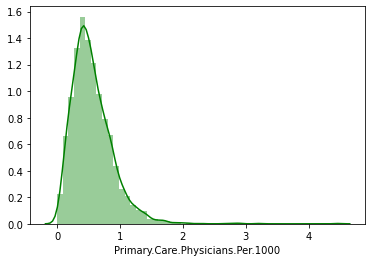

The average value of primary care physicians per 1000 is 0.5579373848987103
The median value of primary care physicians per 1000 is 0.5
The standard deviation of Poor Health is 0.3299090367002319
0.250000   0.337500
0.750000   0.722000
Name: Primary.Care.Physicians.Per.1000, dtype: float64


In [202]:
sns.distplot(county_data["Primary.Care.Physicians.Per.1000"] , color = 'g');
plt.show()
print("The average value of primary care physicians per 1000 is " + str(county_data["Primary.Care.Physicians.Per.1000"].mean()))
print("The median value of primary care physicians per 1000 is " + str(county_data["Primary.Care.Physicians.Per.1000"].median()))
print("The standard deviation of Poor Health is " + str(county_data["Primary.Care.Physicians.Per.1000"].std()))
print(county_data["Primary.Care.Physicians.Per.1000"].quantile([.25,.75]))

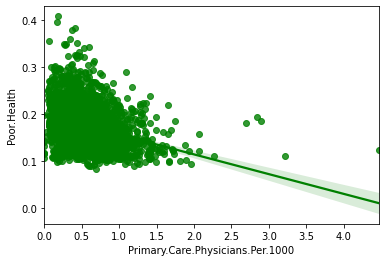

In [171]:
sns.regplot(x="Primary.Care.Physicians.Per.1000", y = "Poor.Health",data = county_data, color = "green")
plt.show()

In [151]:
# Regression analysis of Primary.Care.Physicians.Per.1000
# This is calculated for every variable following in this presentation, but will not be display to spare repetitiveness.
# Relevant data from these results will be explain in analysis. 

physician_modl = smf.ols(formula = 'Q("Poor.Health") ~ Q("Primary.Care.Physicians.Per.1000")', data = county_data) 
physician_regs = physician_modl.fit()
print(physician_regs.summary()) 

                            OLS Regression Results                            
Dep. Variable:       Q("Poor.Health")   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     281.3
Date:                Thu, 22 Oct 2020   Prob (F-statistic):           3.72e-60
Time:                        11:48:21   Log-Likelihood:                 4690.9
No. Observations:                2715   AIC:                            -9378.
Df Residuals:                    2713   BIC:                            -9366.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

## Insurance

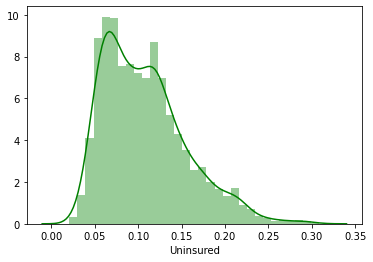

The average uninsured proportion is 0.10778994475138126
The median uninusred proportion is 0.1007
The standard deviation of uninsured proportions is 0.04784059241679467
0.250000   0.069200
0.750000   0.134650
Name: Uninsured, dtype: float64


In [197]:
sns.distplot(county_data["Uninsured"] , color = 'g');
plt.show()
print("The average uninsured proportion is " + str(county_data["Uninsured"].mean()))
print("The median uninusred proportion is " + str(county_data["Uninsured"].median()))
print("The standard deviation of uninsured proportions is " + str(county_data["Uninsured"].std()))
print(county_data["Uninsured"].quantile([.25,.75]))

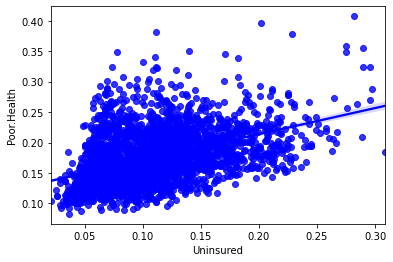

In [169]:
sns.regplot(x="Uninsured", y="Poor.Health", data=county_data, color = "blue")
plt.show()

In [152]:
uninsured_modl = smf.ols(formula = 'Q("Poor.Health") ~ Uninsured', data = county_data) 
uninsured_regs = uninsured_modl.fit()
print(uninsured_regs.summary())

                            OLS Regression Results                            
Dep. Variable:       Q("Poor.Health")   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     701.5
Date:                Thu, 22 Oct 2020   Prob (F-statistic):          1.10e-137
Time:                        11:48:31   Log-Likelihood:                 4869.1
No. Observations:                2715   AIC:                            -9734.
Df Residuals:                    2713   BIC:                            -9722.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1282      0.002     67.296      0.0

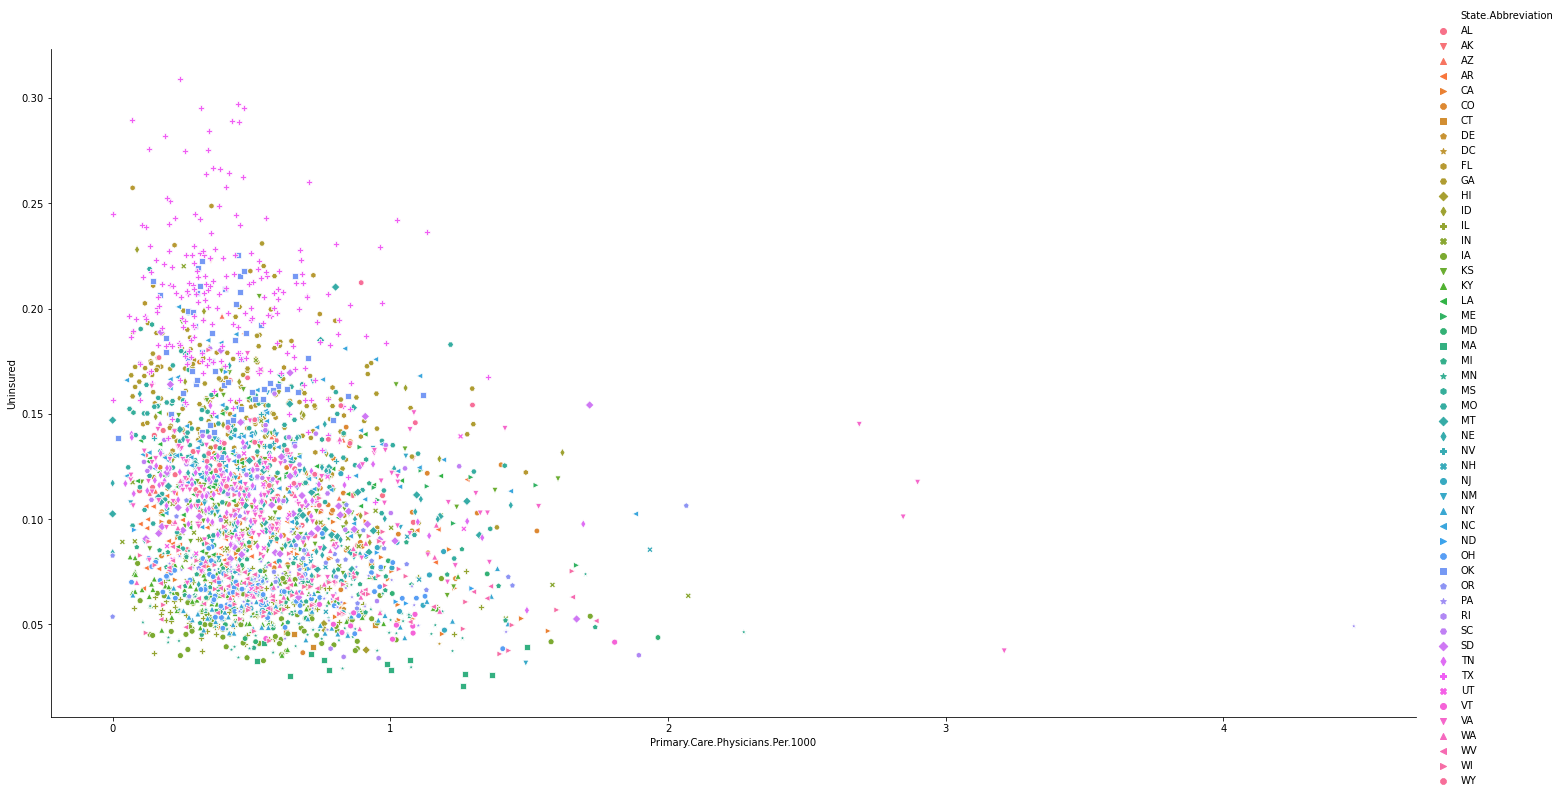

In [227]:
sns.relplot('Primary.Care.Physicians.Per.1000', 'Uninsured', data = county_data, 
            hue="State.Abbreviation", style = "State.Abbreviation", height=10, aspect=2, markers = state_markers); 

# There isn't much of an association between these variables except for possibly a very weak negative association. 
# The r-squared value (0.059) is very low, meaning that this model is not an accurate predictor of the data. 
# The p-value (0.000) indicates that this isn't due to chance, but the association is still rather weak. 

In [228]:
cross1_modl = smf.ols(formula = 'Uninsured ~ Q("Primary.Care.Physicians.Per.1000")', data = county_data) 
cross1_regs = cross1_modl.fit()
print(cross1_regs.summary())

                            OLS Regression Results                            
Dep. Variable:              Uninsured   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     170.0
Date:                Thu, 22 Oct 2020   Prob (F-statistic):           9.67e-38
Time:                        17:38:03   Log-Likelihood:                 4483.9
No. Observations:                2715   AIC:                            -8964.
Df Residuals:                    2713   BIC:                            -8952.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

# Analysis

## Primary Care Physicians per 1000
#### The  r-squared value (0.094) is very low, meaing that the model is not accurate at making predictions and there is a great deal of unexplained varience. However, the low p-value (0.000) indicates that primary physician accessibility has an association to poor health. It has a negative association that is not due to randomness, but it is not strong at all as indicated by the r-squared value. 
#### It's also important to note that the distribution of the primary care physician variable per 1000 is skewed right, meaning that that data is not evenly distributed. This could contribute to this weak association result. 

## Insurance
#### The  r-squared value (0.205) is fairly low, meaing that the model is not very accurate at making predictions and there is some unexplained varience. However, the low p-value (0.000) indicates that uninsured proportions have an association to poor health. It has a positive association that is not due to randomness, but it is not very strong as indicated by the r-squared value. 
#### The distribution of the uninsured variable is slightly skewed right, but it is not as extreme as the distribution of the primary care physician per 1000 variable, which could contribute to this higher r-value, but is likely not the only factor doing so. 

<h2><center> Question 2 </center></h2>
<h3>Variables: Proportion of Smokers, Excessive Drinking</h3>
<h3>Step 1: Graphical and numerical summaries of x-variable AND x-variable against y-variable</h3>
<h3>Step 2: Comparing both predictor variables</h3>
<h3>Step 3: Analysis</h3>

In [175]:
state_markers= [  'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X',
                  'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X', 
                  'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X',
                  'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

## Smoking

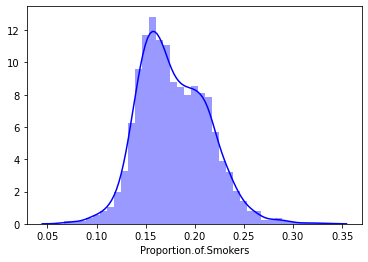

The average smoker proportion is 0.17824322851418087
The median smoker proportion is 0.173542888
The standard deviation of smoker proportions is 0.03474759324113399
0.250000   0.152513
0.750000   0.202849
Name: Proportion.of.Smokers, dtype: float64


In [196]:
sns.distplot(county_data["Proportion.of.Smokers"] , color = 'b');
plt.show()
print("The average smoker proportion is " + str(county_data["Proportion.of.Smokers"].mean()))
print("The median smoker proportion is " + str(county_data["Proportion.of.Smokers"].median()))
print("The standard deviation of smoker proportions is " + str(county_data["Proportion.of.Smokers"].std()))
print(county_data["Proportion.of.Smokers"].quantile([.25,.75]))

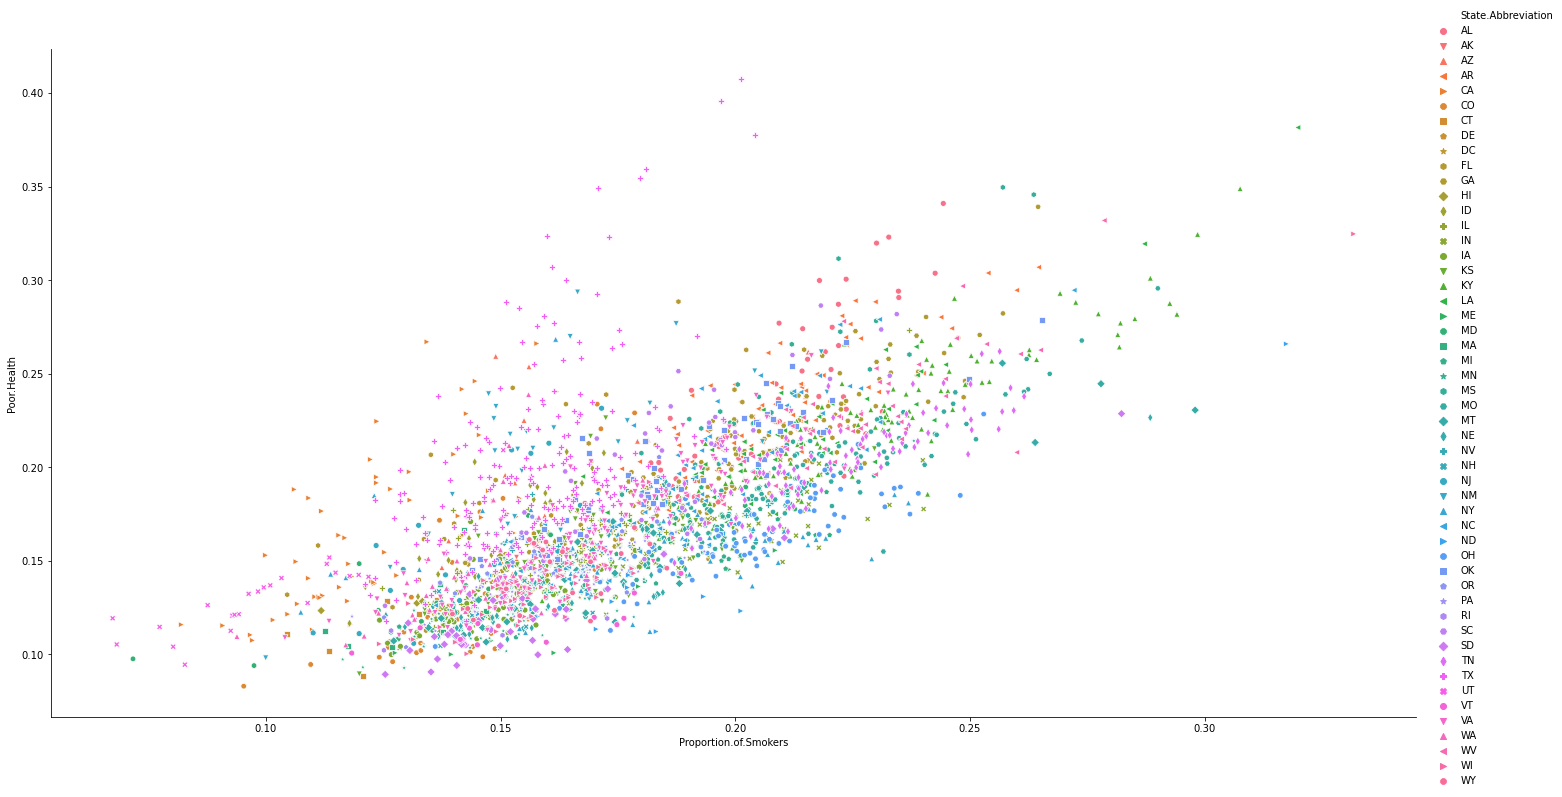

In [183]:
sns.relplot('Proportion.of.Smokers', 'Poor.Health', data = county_data, 
            hue="State.Abbreviation", style = 'State.Abbreviation', height=10, aspect=2, markers = state_markers)

In [155]:
smokers_modl = smf.ols(formula = 'Q("Poor.Health") ~ Q("Proportion.of.Smokers")', data = county_data) 
smokers_regs = smokers_modl.fit()
print(smokers_regs.summary())

                            OLS Regression Results                            
Dep. Variable:       Q("Poor.Health")   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     2986.
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:51:50   Log-Likelihood:                 5564.6
No. Observations:                2715   AIC:                        -1.113e+04
Df Residuals:                    2713   BIC:                        -1.111e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

## Excessive Alcohol Consumption

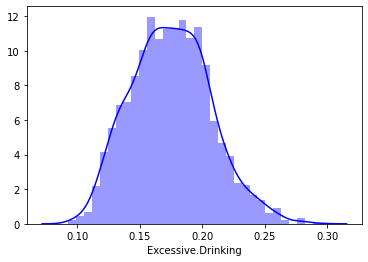

The average excessive drinking proportion is 0.17489430267771616
The median excessive drinking proportion is 0.174272233
The standard deviation of excessive drinking proportions is 0.03192648367169369
0.250000   0.152109
0.750000   0.196637
Name: Excessive.Drinking, dtype: float64


In [195]:
sns.distplot(county_data["Excessive.Drinking"] , color = 'b');
plt.show()
print("The average excessive drinking proportion is " + str(county_data["Excessive.Drinking"].mean()))
print("The median excessive drinking proportion is " + str(county_data["Excessive.Drinking"].median()))
print("The standard deviation of excessive drinking proportions is " + str(county_data["Excessive.Drinking"].std()))
print(county_data["Excessive.Drinking"].quantile([.25,.75]))

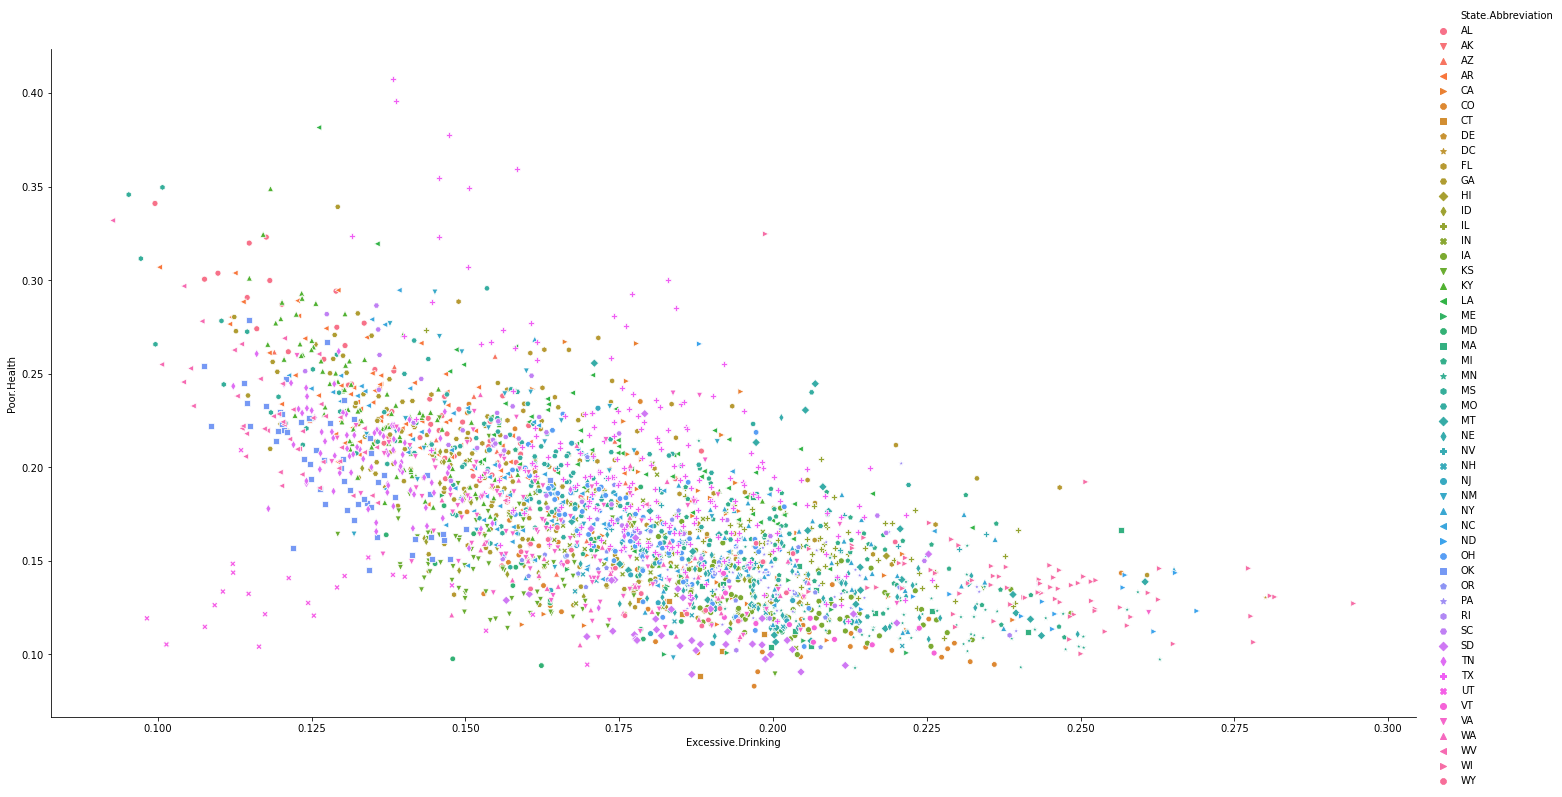

In [184]:
sns.relplot('Excessive.Drinking', 'Poor.Health', data = county_data, 
            hue="State.Abbreviation", style = 'State.Abbreviation', height=10, aspect=2, markers = state_markers)

In [156]:
alcohol_modl = smf.ols(formula = 'Q("Poor.Health") ~ Q("Excessive.Drinking")', data = county_data) 
alcohol_regs = alcohol_modl.fit()
print(alcohol_regs.summary())

                            OLS Regression Results                            
Dep. Variable:       Q("Poor.Health")   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     2100.
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:53:05   Log-Likelihood:                 5335.3
No. Observations:                2715   AIC:                        -1.067e+04
Df Residuals:                    2713   BIC:                        -1.065e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

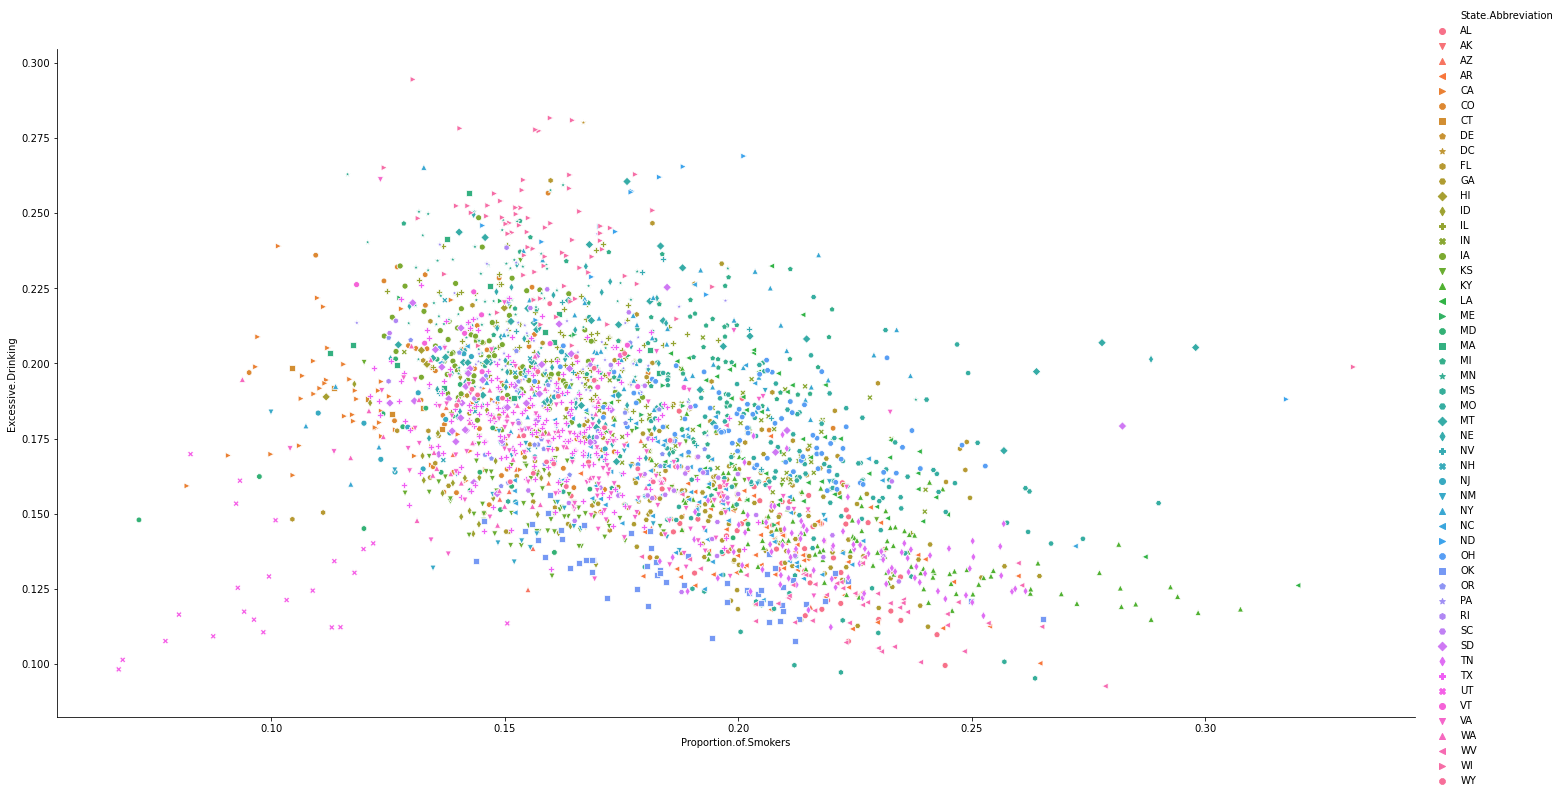

In [229]:
sns.relplot('Proportion.of.Smokers', 'Excessive.Drinking', data = county_data, 
            hue="State.Abbreviation", style = "State.Abbreviation", height=10, aspect=2, markers = state_markers);  
# The r-squared value (0.234) is low but not insignificant, meaning that this model is an ok predictor of the data. 
# The p-value (0.000) indicates that this isn't due to chance. There is a moderate negative association.  

In [230]:
cross2_modl = smf.ols(formula = 'Q("Proportion.of.Smokers") ~ Q("Excessive.Drinking")', data = county_data) 
cross2_regs = cross2_modl.fit()
print(cross2_regs.summary())

                                OLS Regression Results                                
Dep. Variable:     Q("Proportion.of.Smokers")   R-squared:                       0.234
Model:                                    OLS   Adj. R-squared:                  0.234
Method:                         Least Squares   F-statistic:                     830.4
Date:                        Thu, 22 Oct 2020   Prob (F-statistic):          1.52e-159
Time:                                17:44:28   Log-Likelihood:                 5632.0
No. Observations:                        2715   AIC:                        -1.126e+04
Df Residuals:                            2713   BIC:                        -1.125e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

# Analysis

## Smoking
#### The  r-squared value (0.524) is relatively high, meaing that the model is pretty accurate at making predictions and there is some unexplained varience. The low p-value (0.000) indicates that smoking has an association to poor health. It has a positive association that is not due to randomness, and it is fairly strong as indicated by the r-squared value. 
#### The distribution of the smoking variable slightly resembles a normal distribution, which could contribute to the stronger relationship observed between smoking and poor health.

## Excessive Drinking
#### The  r-squared value (0.436) is moderatly high, meaing that the model is decently accurate at making predictions and there is some unexplained varience. The low p-value (0.000) indicates that excessive drinking has an association to poor health. Interestingly, it has a moderately strong positive association that is not due to randomness, which is the opposite of what we would expect since we know that too much alcohol is bad for your health!
#### The distribution of the excessive alcohol variable resembles a normal distribution, which could contribute to the moderately strong relationship observed between excessive drinking and poor health.   

<h2><center> Question 3 </center></h2>
<h3>Variables: Median Household Income, Unemployement </h3>
<h3>Step 1: Graphical and numerical summaries of x-variable AND x-variable against y-variable</h3>
<h3>Step 2: Comparing both predictor variables</h3>
<h3>Step 3: Analysis</h3>

## Median Household Income

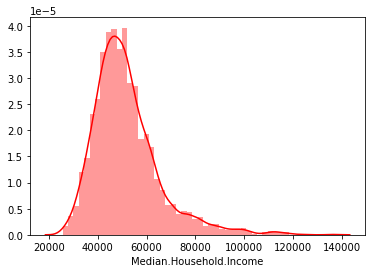

The average median household income is 51606.55727440147
The median of median household incomes is 49350.0
The standard deviation of median household incomes is 13650.706994167755
0.250000   42680.000000
0.750000   57274.500000
Name: Median.Household.Income, dtype: float64


In [199]:
sns.distplot(county_data["Median.Household.Income"] , color = 'r');
plt.show()
print("The average median household income is " + str(county_data["Median.Household.Income"].mean()))
print("The median of median household incomes is " + str(county_data["Median.Household.Income"].median()))
print("The standard deviation of median household incomes is " + str(county_data["Median.Household.Income"].std()))
print(county_data["Median.Household.Income"].quantile([.25,.75]))

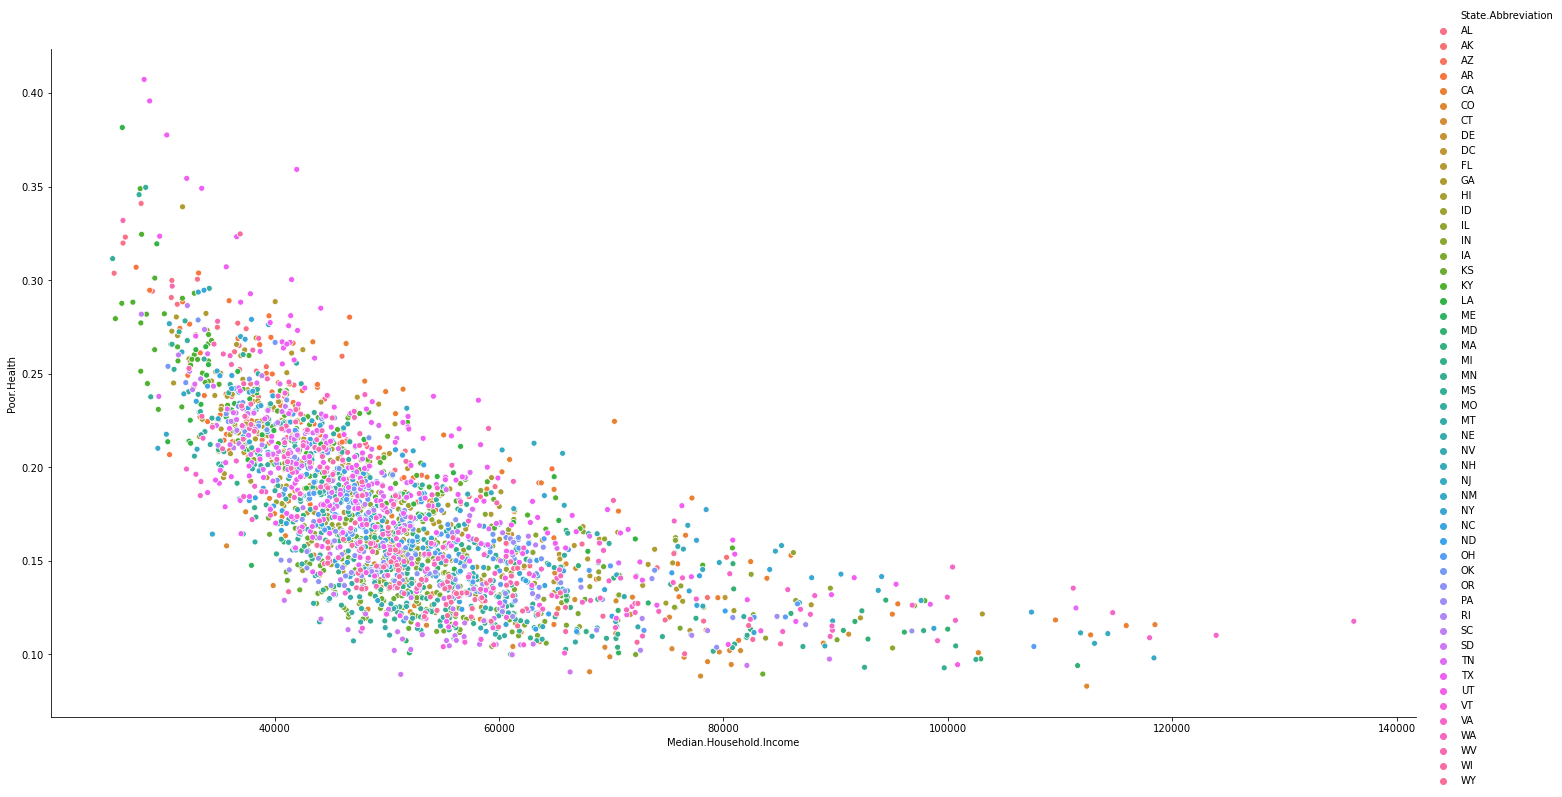

In [100]:
sns.relplot('Median.Household.Income', 'Poor.Health', data = county_data, 
            hue="State.Abbreviation", height=10, aspect=2)


In [157]:
income_modl = smf.ols(formula = 'Q("Poor.Health") ~ Q("Median.Household.Income")', data = county_data) 
income_regs = income_modl.fit()
print(income_regs.summary())

                            OLS Regression Results                            
Dep. Variable:       Q("Poor.Health")   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     2335.
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:53:53   Log-Likelihood:                 5399.9
No. Observations:                2715   AIC:                        -1.080e+04
Df Residuals:                    2713   BIC:                        -1.078e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

## Unemployment

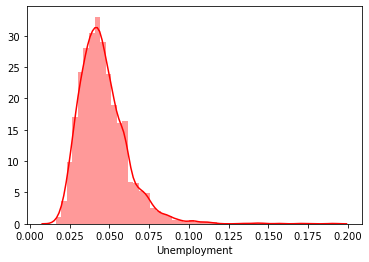

The average unemployment is 0.04609930018416204
The median unemployment is 0.0438
The standard deviation of unemployment is 0.015426680997997707
0.250000   0.035800
0.750000   0.053350
Name: Unemployment, dtype: float64


In [200]:
sns.distplot(county_data["Unemployment"] , color = 'r');
plt.show()
print("The average unemployment is " + str(county_data["Unemployment"].mean()))
print("The median unemployment is " + str(county_data["Unemployment"].median()))
print("The standard deviation of unemployment is " + str(county_data["Unemployment"].std()))
print(county_data["Unemployment"].quantile([.25,.75]))

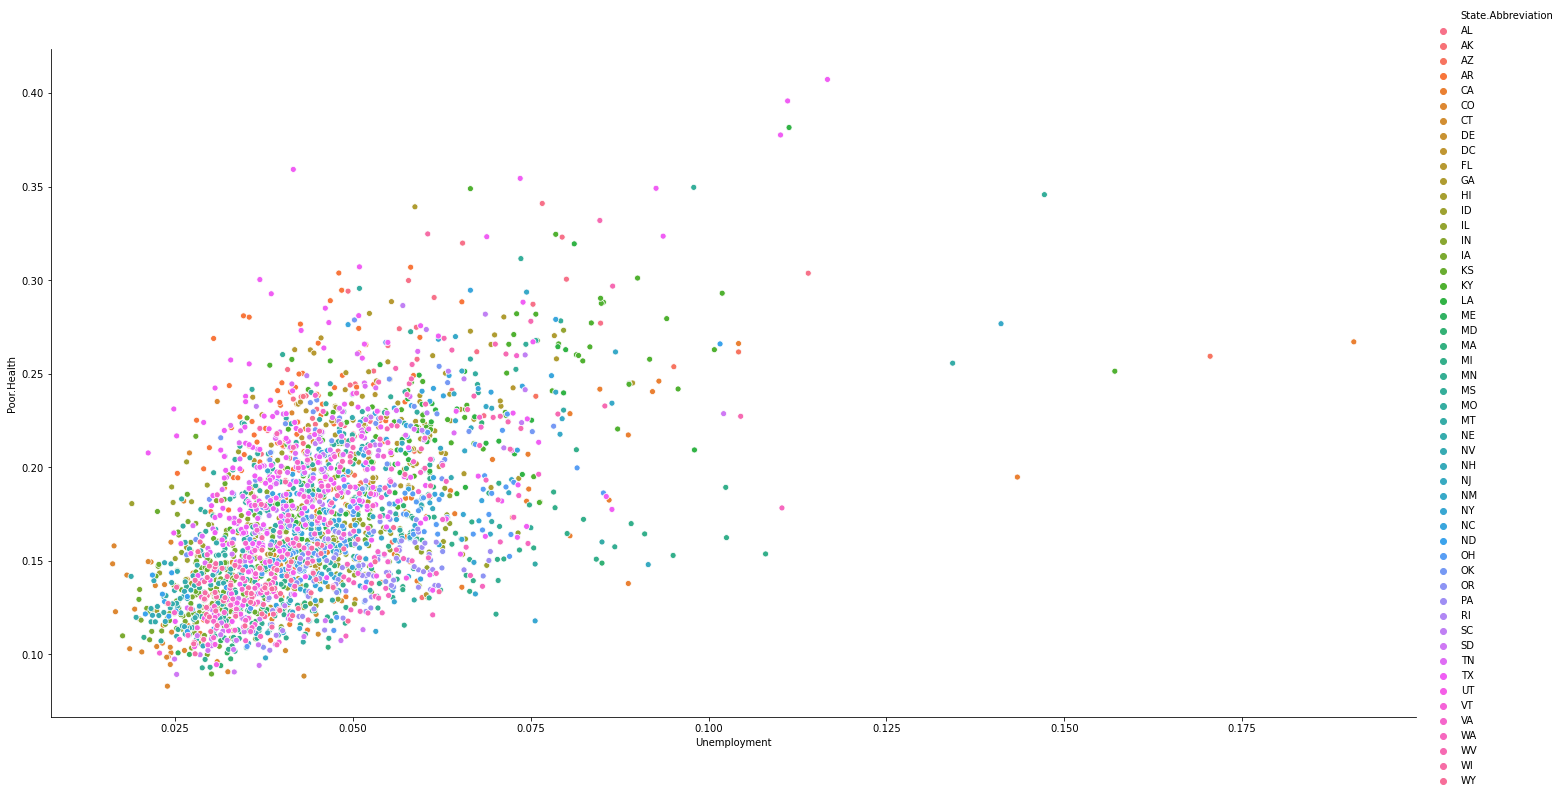

In [99]:
sns.relplot('Unemployment', 'Poor.Health', data = county_data, 
            hue="State.Abbreviation", height=10, aspect=2)

In [158]:
unemployment_modl = smf.ols(formula = 'Q("Poor.Health") ~ Unemployment', data = county_data) 
unemployment_regs = unemployment_modl.fit()
print(unemployment_regs.summary())

                            OLS Regression Results                            
Dep. Variable:       Q("Poor.Health")   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     1142.
Date:                Thu, 22 Oct 2020   Prob (F-statistic):          2.57e-209
Time:                        11:54:49   Log-Likelihood:                 5034.0
No. Observations:                2715   AIC:                        -1.006e+04
Df Residuals:                    2713   BIC:                        -1.005e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1009      0.002     44.009   

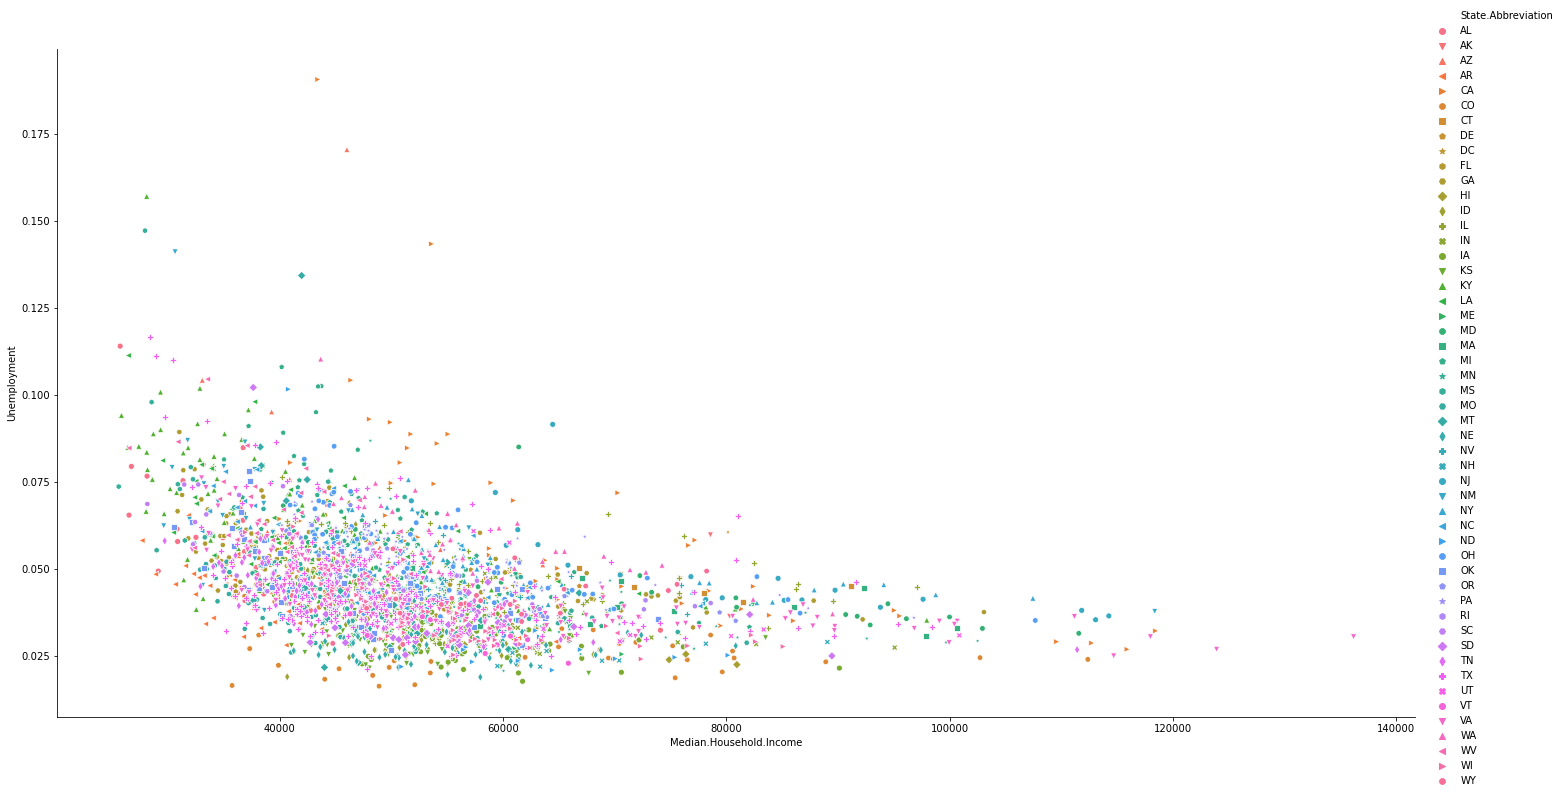

In [232]:
sns.relplot('Median.Household.Income', 'Unemployment', data = county_data, 
            hue="State.Abbreviation", style = "State.Abbreviation", height=10, aspect=2, markers = state_markers);  
# The r-squared value (0.190) is fairly low, meaning that this model is not a good predictor of the data. 
# The p-value (0.000) indicates that this isn't due to chance. There is a weak negative association. 
# It seems like the decline of unemployment as median household income increases starts to plateau past 60,000.

In [233]:
cross3_modl = smf.ols(formula = 'Unemployment ~ Q("Median.Household.Income")', data = county_data) 
cross3_regs = cross3_modl.fit()
print(cross3_regs.summary())

                            OLS Regression Results                            
Dep. Variable:           Unemployment   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     637.5
Date:                Thu, 22 Oct 2020   Prob (F-statistic):          1.63e-126
Time:                        17:49:07   Log-Likelihood:                 7760.6
No. Observations:                2715   AIC:                        -1.552e+04
Df Residuals:                    2713   BIC:                        -1.551e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

# Analysis

## Median Household Income
#### The  r-squared value (0.463) is moderatly high, meaing that the model is pretty accurate at making predictions and there is some unexplained varience. The low p-value (0.000) indicates that median household income has an association to poor health. It has a moderate negative association with poor health that is not due to randomness. 
#### The distribution of the median household income variable is skewed right, which could contribute to the r-squared value not being as high as expect from looking at the income vs. poor health graph, which doesn't suggest much variance compared to other variables. 

## Unemployment
#### The  r-squared value (0.296) is fairly low, meaing that the model is not very accurate at making predictions and there is a decent amount of unexplained varience. However, the low p-value (0.000) indicates that unemployment has an association to poor health. It is a weak positive association that is not due to randomness. 
#### The distribution of the unemployment variable is skewed right, which may contribute to the lower r-squared value.

## Simple Tree
### Now we will create a predictive model for poor health using a simple tree. 

In [222]:
Xcts = county_data[['Uninsured','Primary.Care.Physicians.Per.1000','Adult.Obesity',
                    'Proportion.of.Smokers', 'Physical.Inactivity', 'Excessive.Drinking','Median.Household.Income',
                   'Unemployment']] 
y = county_data[['Poor.Health']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xcts, y, test_size = .5 , random_state = 0)

from sklearn import tree
import sklearn
print(sklearn.__version__)

regtree = tree.DecisionTreeRegressor(max_leaf_nodes = 8)

0.23.1


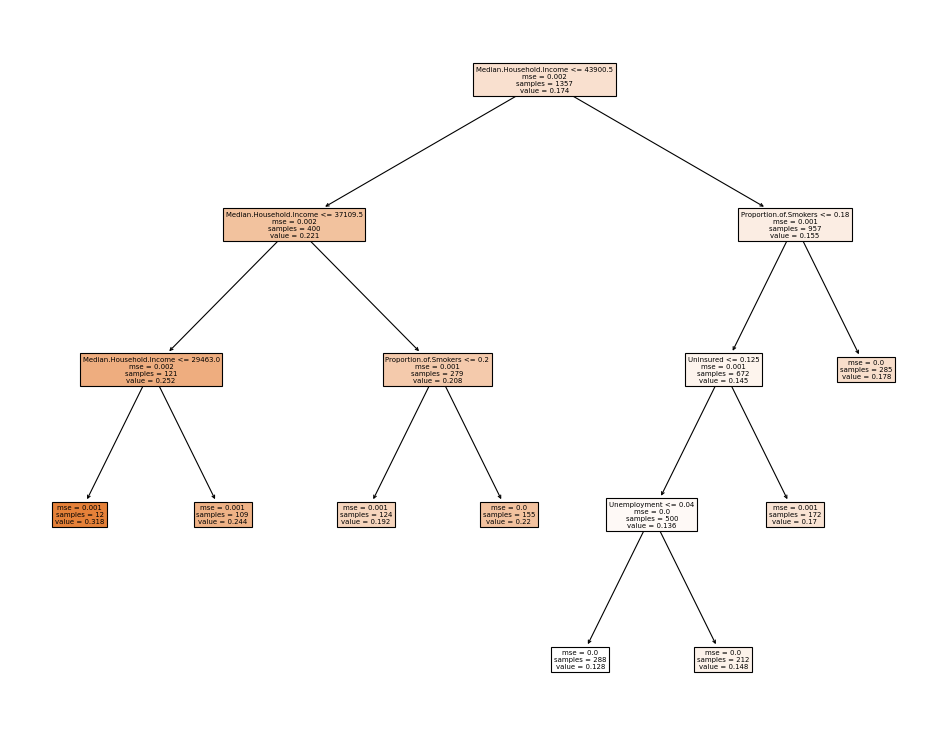

In [223]:
regtree = regtree.fit(X_train, y_train)
fig = plt.figure(num=None, figsize = (15,12), dpi = 80, facecolor = "w", edgecolor = "k")
tree.plot_tree(regtree, feature_names = Xcts.columns, filled=True);



## Variable Importance

In [225]:
#We will use the variable importance metric to rank the top 5 predictors of Poor.Health according to the tree model. 
#The variable importance metric calculates which variables are most helpful in the prediciton. 

importances = pd.DataFrame({'Feature':X_train.columns, 'Importance': np.round(regtree.feature_importances_,3 )})
importances = importances.sort_values('Importance', ascending = False)
print(importances[:5])


                            Feature  Importance
6           Median.Household.Income    0.760000
3             Proportion.of.Smokers    0.140000
0                         Uninsured    0.075000
7                      Unemployment    0.025000
1  Primary.Care.Physicians.Per.1000    0.000000


## Interpretation of Tree

In [ ]:
# We can find what variables and values best characterize counties with the highest poor health proportions. 
# We will start from the rootnode and navigate down the tree. 
# Rootnode: Counties with high poor health have lower household median incomes (<=43900.5 ; true). 
# Left child: Counties with the highest poor health typically also have a household median incomes <= 37109.5 (true).
# Left child: Countires with the highest poor health have household median incomes above and below 29463.0. 
# However, if you define the highest poor health by the top three, then this node returns true. 
# We have reached the terminal node of the tree, there are no descendants. 

# As seen through this analysis, median household income is the most important factor to consider (out of the 6 predictor variables selected in this study) in predicting high reportings of poor health.
# For the lowest reportings of poor health, we follow the same metholodogy.
# The result is that these counties are characterized by the following: 
# median household incomes above 43900.5
# proportions of smokers under .18
# unemployment proporitons under .04. 
#Thus, these are the next most important variables.

# Conclusions

### Based on the regression analysis and tree model, we can answer our Key Questions:

#### Question 1: Neither Primary Care Physicians Per 1000 nor Insurance are a strong predictor of Poor Health. 

#### Question 2: It depends on the variable. Smoking is a strong predictor of poor health with a positive assocation.  Interestingly, higher levels of excessive drinking are negatively associated with a poor health, but it is a weaker predictor. 

#### Question 3: There is a relationship between financial security and poor health. Median household income is a very strong predictor of poor health with a negative association.  Higher unemploymemt is associated with a higher poor health score, but it is a weaker predictor.